In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Подготовка данных о продажах путёвок

In [2]:
"""
Из файлов CSV считываются данные и помещаются в объекты DataFrame.
Все заголовки столбцов переименовываются с русского на английский.
"""
sales = pd.read_csv(
    'sale_of_tour_packages.csv',
    delimiter=';'
).rename(columns={
    'ID операции': 'saleid',
    'Дата': 'date',
    'ID тура': 'tourid',
    'ID туроператора': 'agentid',
    'Количество проданных путёвок': 'number'
})
agents = pd.read_csv(
    'travel_agents.csv',
    delimiter=';'
).rename(columns={
    'ID туроператора': 'agentid',
    'Название': 'name',
    'Адрес': 'address'
})
tours = pd.read_csv(
    'travels.csv',
    delimiter=';'
).rename(columns={
    'ID тура': 'tourid',
    'Город': 'city',
    'Продолжительность, дней': 'duration',
    'Стоимость, на 1 чел': 'price'
})

"""
Производится слияние таблицы sales с таблицами agents и tours
по значениям признаков agentid и tourid соответственно.
"""
sales = sales.merge(agents, on='agentid')
sales = sales.merge(tours, on='tourid')

""" Ненужные в данной задаче столбцы удаляются. """
sales = sales.drop(
    columns=['saleid', 'date', 'tourid', 'agentid', 'address']
)
print(sales.head(3))

   number            name       city  duration  price
0      15         Восторг       Кемь         5  17300
1      14  Путешественник   Мурманск         5  29200
2      13        Оглянись  Сыктывкар        10  11400


# Проданные путёвки в города на букву «С»

Найти количество человек, совершивших путешествие в города, чьи названия начинаются на букву "С".

In [3]:
"""
Фильтруются записи, в которых название города начинается на букву С.
Затем считается и выводится общее количество проданных путёвок.
"""
print(sales[sales.city.str.startswith('С')].number.sum())

8803


# Распределение путёвок, проданных туроператором «Восторг»

Построить круговую диаграмму, показывающую общую стоимость путёвок и стоимость путёвок по каждому городу, которые были проданы туроператором "Восторг".

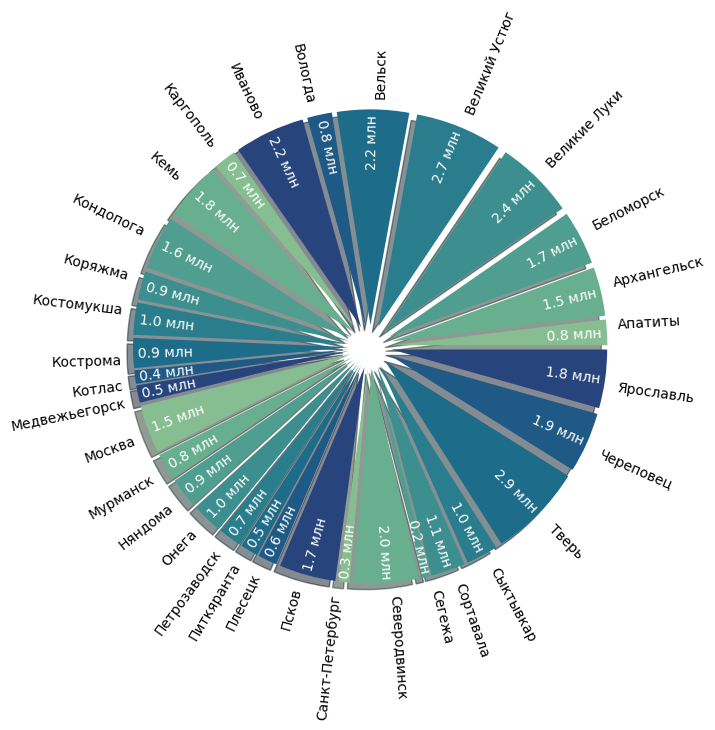

In [ ]:
"""
Фильтруются записи, в которых туроператором является Восторг.
Столбцы city (название города), number (количество проданных путёвок)
и price (стоимость каждой путёвки) сохраняются в новый DataFrame.
"""
sales_fbn = sales.loc[
    sales.name == 'Восторг',
    ['city', 'number', 'price']
]

"""
Добавляется столбец total,
содержащий общую стоимость путёвок для каждой записи.
"""
sales_fbn['total'] = sales_fbn.number * sales_fbn.price

""" Больше ненужные столбцы number и price удаляются. """
sales_fbn = sales_fbn.drop(columns=['number', 'price'])

"""
Записи группируются по городам, столбец total теперь содержит
общую стоимость путёвок для каждого города. Полученный DataFrame
транспонируется и сжимается, преобразовываясь в объект Series,
индексами которого являются города, а значениями стоимости.
"""
sales_gbc = sales_fbn.groupby(by='city').sum().T.squeeze()

""" Задаётся размер диаграммы. """
plt.figure(figsize=(7, 7))

"""
Создаётся круговая диаграмма функцией pie библиотеки Matplotlib.

Функции передаётся единственный позиционный аргумент - значения,
на основании которых будут построены клины круговой диаграммы,
а именно общие стоимости проданных путёвок по каждому городу.

Функции передаются следующие именнованные аргументы:
- explode: список вещественных чисел, задающий смещение каждого
клина относительно центра диаграммы;
- labels: подписи рядом с клинами диаграммы, а именно города;
- colors: цветовая палитра, задающаяся функцией библиотеки Seaborn;
- autopct: лямбда-функция, задающая подпись на каждом клине
диаграммы; так как каждый клин содержит долю в процентах от общей
стоимости, то восстанавливается исходное значение в миллионах;
- pctdistance: смещение подписей на клинах относительно центра;
- labeldistance: смещение подписей рядом с клинами;
- shadow: добавляет тень от каждого клина;
- rotatelabels: поворачивает подписи рядом с клинами.

Функция возвращает три значения, два из которых являются списками
объектов, отвечающих за подписи на клинах и рядом с ними.
"""
_, city_labels, cost_labels = plt.pie(
    sales_gbc.values,
    explode=([0.1] * (len(sales_gbc.index))),
    labels=sales_gbc.index,
    colors=sns.color_palette('crest', n_colors=8),
    autopct=lambda x: f'{x * sales_gbc.sum() / 10 ** 8:.1f} млн',
    pctdistance=0.85,
    labeldistance=1.05,
    shadow=True,
    rotatelabels=True
)

"""
В цикле для каждой пары подписей вращение подписи рядом с клином
присваивается вращению подписи на клине. Также цвет шрифта подписи
на клине меняется на белый.
"""
for city_label, cost_label in zip(city_labels, cost_labels):
    cost_label.set_rotation(city_label.get_rotation())
    cost_label.set_color('white')

""" Отображаются созданные ранее фигуры библиотеки Matplotlib. """
plt.show()

# Градация путёвок по продолжительности

Построить гистограмму, показывающую градацию туров по продолжительности путешествия.

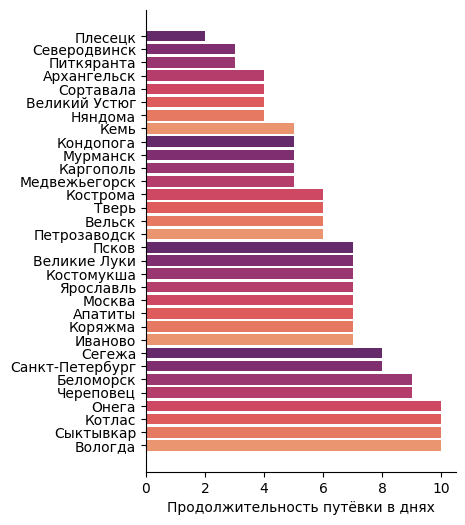

In [ ]:
"""
Столбцы city (название города) и duration (продолжительность
путёвки в днях) сохраняются в новый DataFrame.
"""
sales_d = sales.loc[:, ['city', 'duration']]

""" Удаляются записи-дупликаты. """
sales_d = sales_d.drop_duplicates()

""" Записи сортируются в порядке убывания продолжительности. """
sales_d = sales_d.sort_values('duration', ascending=False)

""" Задаётся размер диаграммы. """
plt.figure(figsize=(4, 6))

"""
Создаётся гистограмма функцией barh библиотеки Matplotlib.
Функции передаются три агрумента: подписи линий гистограммы,
а именно названия городов, значения, задающие длину линий
гистограммы, а именно продолжительности путёвок в днях,
и цветовая палитра, задающаяся функцией библиотеки Seaborn.
"""
plt.barh(
    sales_d.city,
    sales_d.duration,
    color=sns.color_palette('flare', n_colors=8)
)

""" Скрываются верхняя и правая полоски сетки. """
plt.gca().spines[['top', 'right',]].set_visible(False)

""" Добавляется подпись горизонтальной оси гистограммы. """
plt.xlabel('Продолжительность путёвки в днях')

""" Отображаются созданные ранее фигуры библиотеки Matplotlib. """
plt.show()